In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    return sigm(z)*(1.0 - sigm(z))

In [3]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = inputs
        self.train_outputs = out
          
        np.random.seed(23)
        # hidden layer of n neurons
        self.w2 = np.random.randn(N,M)
        self.b2 = np.random.randn(N,1)
        
        # output layer has o neurons
        self.w3 = np.random.randn(O,N)
        self.b3 = np.random.randn(O,1)
        
    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):        
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):
            a1 = x.reshape(M,1)              
            z2 = self.w2.dot(a1) + self.b2   
            a2 = sigm(z2)                   
            
            z3 = self.w3.dot(a2) + self.b3  
            a3 = sigm(z3)          
            
            y = y.reshape(O,1)
            
            delta3 = (a3-y) * sigm_deriv(z3)                   
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  
                                                               
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T) 
        
           
            cost += ((a3 - y)**2).sum() 
        
            #Cross-entropy Cost Function
            #cost += (y*np.log(a3) - (1-y) * np.log(1-a3)).sum()
            
        n = len(ys)  # number of training vectors           
        # get the average change per training input  
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
            
    

[[0.4321933  0.52195082 0.43163385 0.51250656]]
[[0.01811498 0.96424549 0.96500208 0.0451698 ]]


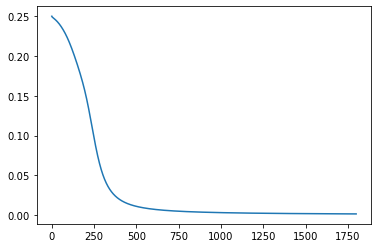

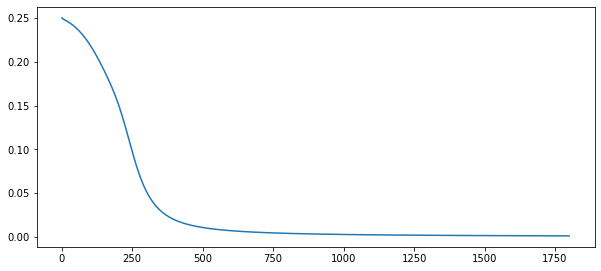

In [4]:
#Problem1  

#Initialsing the inputs array
inputs = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

#Initialsing the Outputs array
out = np.array([0,1,1,0])

N = 4 #Number of neurons in the hidden layer
M = 3 #Number of Inputs
O = 1 #Number of Outputs

xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1800
c = xor.train(epochs, 3.0)

result = xor.feedforward(xs)
print(result)

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(1,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
 

[[0.65996267 0.57436115 0.56836673 0.54440382 0.66146227 0.52241302
  0.61336377]
 [0.56899739 0.54110372 0.51610062 0.50668867 0.57061445 0.51577405
  0.54295979]]
[[0.98835547 0.10028716 0.99385804 0.99364739 0.99947016 0.91870885
  0.91908079]
 [0.07350164 0.99644017 0.5295046  0.53814725 0.00390175 0.89834806
  0.8841372 ]]


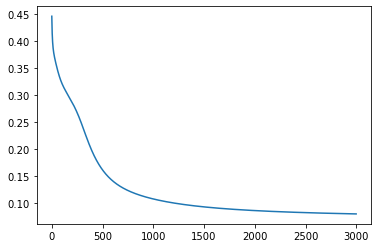

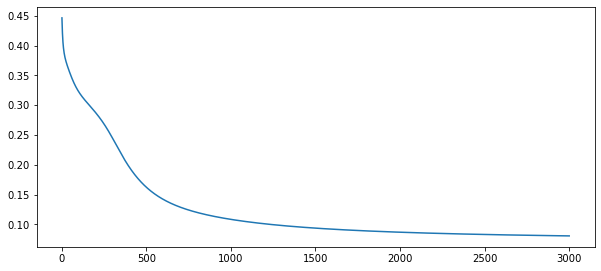

In [5]:
#Problem2

#Initialsing the inputs array
inputs = np.array([[1,1,0], [1,-1,-1], [-1,1,1], [-1,-1,1], [0,1,-1], [0,-1,-1], [1,1,1]])

#Initialsing the Outputs array
out = np.array([[1,0],[0,1],[1,1],[1,0],[1,0],[1,1],[1,1]])

N = 2 #Number of neurons in the hidden layer
M = 3 #Number of Inputs
O = 2 #Number of Outputs

xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 3000
c = xor.train(epochs, 1.0)

result = xor.feedforward(xs)
print(result)

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(1,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)

[[0.85627041 0.78520541 0.78418707 0.8452919  0.74035532 0.76052699
  0.75834865 0.72958842 0.74058934 0.75109237 0.74259373]
 [0.85415238 0.87709494 0.88035019 0.8497986  0.88565623 0.84252617
  0.87315745 0.88167293 0.87818327 0.88120657 0.85518651]
 [0.22210963 0.41251964 0.56278615 0.26048453 0.529223   0.27462797
  0.53750844 0.60366794 0.56953569 0.69984362 0.33981559]]
[[0.00124433 0.0039781  0.06832462 0.00492444 0.01447118 0.11808819
  0.21628469 0.84085926 0.87773508 0.91741475 0.15038758]
 [0.02859661 0.08909276 0.79367923 0.13293673 0.10590287 0.81730181
  0.79594318 0.1690973  0.13130279 0.08758467 0.86215362]
 [0.98830278 0.94896684 0.18440857 0.90699627 0.86270256 0.0870261
  0.05824967 0.02195056 0.02169139 0.01784954 0.05831241]]

Result for Female without car ownership, willing to pay expensive travel cost and having medium income level

0.15038758495526638  Bus 
0.8621536197497998   Train 
0.058312414485222765  Car 


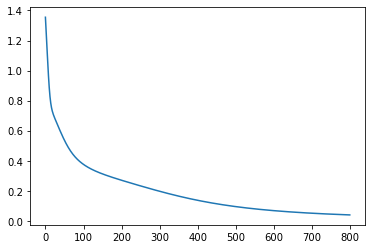

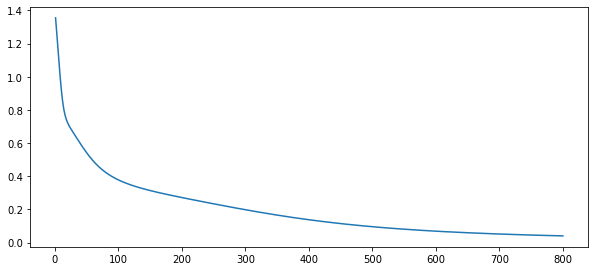

In [6]:
#Problem 3  
#Initialsing the inputs array
inputs = np.array([[1,0,0,0], [1,1,0,1], [0,1,0,1], [0,0,0,0], 
                   [1,1,0,2], [1,0,2,1], [0,1,1,1], [0,1,2,2], 
                   [1,2,2,1], [0,2,2,2], [0,0,2,1]])

#Initialsing the outputs array
out = np.array([[0,0,1],[0,0,1],[0,1,0],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[1,0,0],[1,0,0],[1,0,0]])

N = 4 #Number of neurons in the hidden layer
M = 4 #Number of Inputs
O = 3 #Number of Outputs

xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 800
c = xor.train(epochs, 1.0)

result = xor.feedforward(xs)
print(result)

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(1,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)

#Trained results for Female without car ownership, willing to pay expensive travel cost and having medium income level.
#(0,0,1) = bus
#(0,1,0) = train
#(1,0,0) = car

#initialsiing variables
count = 0
count2 = 0

print()
print("Result for Female without car ownership, willing to pay expensive travel cost and having medium income level")
print()

#loops through result and stores the 3 trained outputs in positions 10 in the array
for i in range(len(result)):
    for j in range(len(result[i])):
        count += 1
        if(count == 11):
            if(count2 == 0):
                count2 += 1
                print(result[i][j]," Bus", end=' ')
            elif(count2 == 1):
                count2 += 1
                print(result[i][j],"  Train", end=' ')
            else:
                print(result[i][j]," Car", end=' ')
            
    count = 0    
    print()
    
#Exporting the result of feedforward 
df = pd.DataFrame(result)
df.to_csv('transport.csv', sep=',', encoding='utf-8', index=False)

[[0.80649701 0.81644522 0.80860866 0.8004953  0.80043459 0.77410423
  0.78801767 0.80239875 0.80533169 0.81600676 0.80462625 0.79215267
  0.82015762 0.81892296 0.82084713 0.77761728 0.79287547 0.79928749
  0.79447958 0.78523881 0.80626624 0.78092016 0.80881575 0.77904921
  0.77970276 0.81157756 0.78360441 0.80512383 0.81265712 0.79595895
  0.80235893 0.80051408 0.79433139 0.79709397 0.81600676 0.82139332
  0.82261974 0.81600676 0.80629167 0.80540435 0.80082164 0.82349563
  0.80022072 0.76553536 0.76014914 0.80684576 0.78796352 0.8014474
  0.80158728 0.80991993 0.71216285 0.69186668 0.70480541 0.72738886
  0.71198562 0.70081416 0.67818638 0.73444007 0.72203142 0.6952398
  0.75409621 0.69140025 0.76672955 0.69907843 0.70808006 0.71273974
  0.68048341 0.73333364 0.73494942 0.73451663 0.66545251 0.72148272
  0.71576524 0.71533171 0.72077482 0.71450708 0.72436898 0.69131822
  0.69391819 0.7467231  0.73823968 0.74634805 0.72462452 0.68938936
  0.67668171 0.67139087 0.70191208 0.7469435  0.69

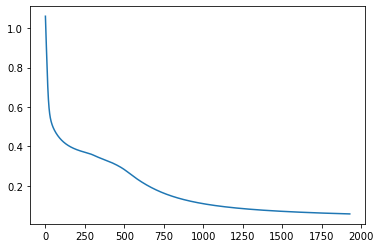

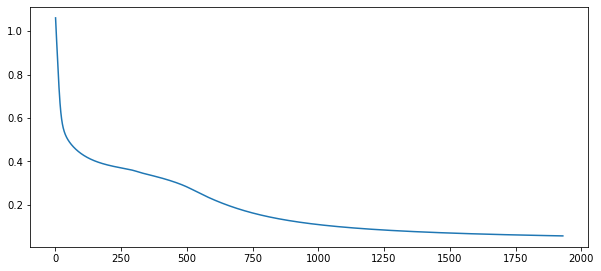

In [7]:
#Problem 4

#Reading in the first four columns of the iris.csv file into iris_df1
iris_df1 = pd.read_csv('iris_data.csv', header = None, usecols=[0,1,2,3])

#initialising inputs
inputs = iris_df1.to_numpy()

#Reading in columns 4,5 and 6 from the iris.csv file into iris_df2
iris_df2 = pd.read_csv('iris_data.csv', header = None, usecols=[4,5,6])

#initialising out
out = iris_df2.to_numpy()

N = 4 #Number of neurons in the hidden layer
M = 4 #Number of Inputs
O = 3 #Number of outputs

xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1930
c = xor.train(epochs, 0.5)

result = xor.feedforward(xs)
print(result)

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(1,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)

#Exporting the result of feedforward 
df = pd.DataFrame(xor.feedforward(xs))
df.to_csv('irisresult.csv', sep=',', encoding='utf-8', index=False)